In [4]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import random
import pickle
import matplotlib.pyplot as plt
import torchvision.models as models
from PIL import Image
import cv2


In [16]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [17]:
f = open("dataset/CIFAR-10/train_CIFAR.pickle", "rb")
train = pickle.load(f)
f.close()
f = open("dataset/CIFAR-10/test_CIFAR.pickle", "rb")
test = pickle.load(f)
f.close()


In [18]:
train_X = train["X"]
train_y = train["Y"]
test_X = train["X"]
test_y = train["Y"]

In [19]:
# train_X.head()

In [20]:
# train_y.head()

In [21]:
# train_dataset = np.concatenate((train_X, train_y ), axis = 1)
# test_dataset = np.concatenate((test_X, test_y ), axis = 1)

In [22]:
# columns = []
# for i in range(3072):
#     columns.append("Col " + str(i+1))
# columns.append("val")

In [23]:
# train_df = pd.DataFrame(data = train_dataset, columns = columns )
# test_df = pd.DataFrame(data = test_dataset, columns = columns )

In [24]:
def plot_images(n_images, images, labels):
    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))
    fig = plt.figure(figsize = (10, 10))
    
    for i in range(rows*cols):
        img = train_X[i].reshape(3,32,32)
        img = img.transpose(1, 2, 0)
        
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(img)
        ax.set_title(labels[i])
        ax.axis('off')
        

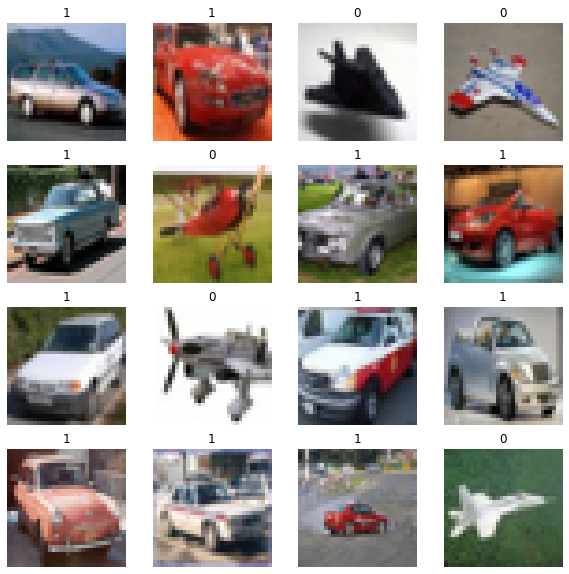

In [25]:
plot_images(20, train_X, train_y)

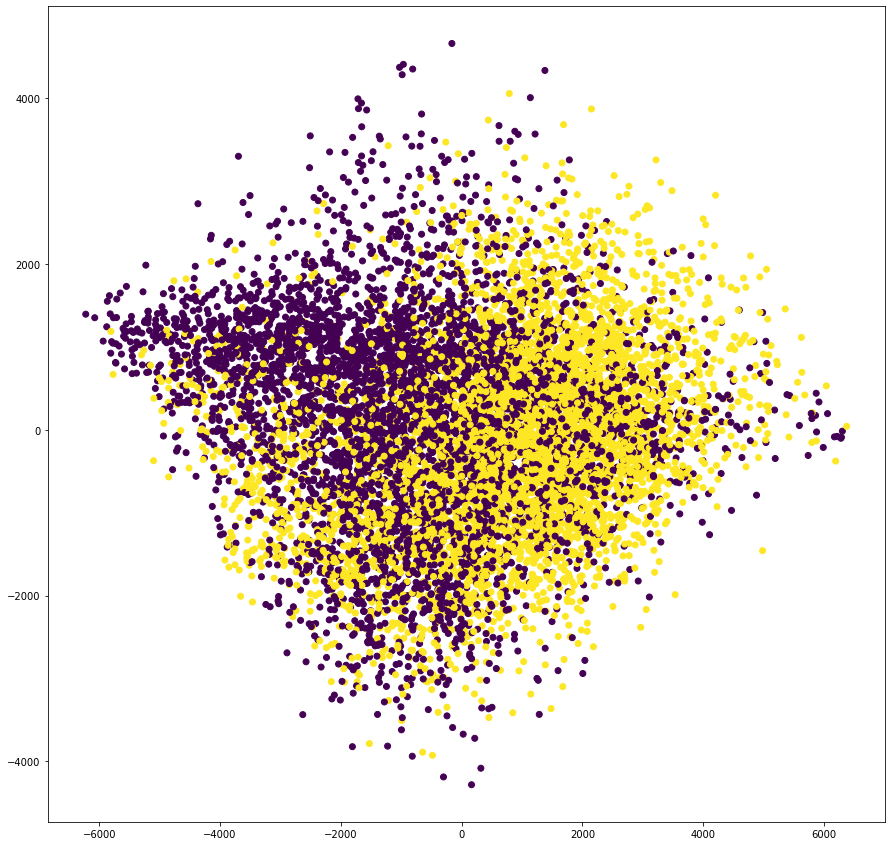

In [26]:
# features = np.array( [ data_training[i][0].flatten() for i in range(nsamples)] )
# labels   = np.array( [ data_training[i][1] for i in range(nsamples)])

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(train_X)

X = pca.transform(train_X)

from matplotlib import pyplot as plt
plt.figure( figsize=(15,15) )
plt.scatter(X[:, 0], X[:, 1], c=train_y)
plt.show()

In [27]:
new_train_X = []

In [29]:
for i in tqdm(range(len(train_X)), leave = True, position = 0):
    im = train_X[i,:]
    img = im.reshape(32, 32, 3)
    img = cv2.resize(img, (256, 256))
    img = np.array(img, np.float32)
    new_train_X.append(img)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2060.05it/s]


In [30]:
new_test_X = []

In [ ]:
for i in tqdm(range(len(test_X)), leave = True, position = 0):
    im = test_X[i,:]
    img = im.reshape(32, 32, 3)
    img = cv2.resize(img, (256, 256))
    img = np.array(img, np.float32)
    new_test_X.append(img)

 58%|███████████████████████████████████████████▊                                | 5758/10000 [00:05<00:14, 286.22it/s]

In [57]:
# train_X = pd.DataFrame(train_X)
# train_y = pd.DataFrame(train_y)
# test_X = pd.DataFrame(test_X)
# test_y = pd.DataFrame(test_y)

In [58]:
# train_X.head()

In [59]:
# train_y.head()

In [60]:
def calculate_class_distribution(labels):
    n = len(labels)
    classes = np.unique(labels)
    for i in classes:
        curr = np.count_nonzero(labels == i)
        print("Class frequency of ", i , " is ", str(curr), "/", str(n))
        

In [61]:
calculate_class_distribution(np.asarray(train_y))

Class frequency of  0  is  5000 / 10000
Class frequency of  1  is  5000 / 10000


In [62]:
alexnet = models.alexnet(pretrained=True)

In [63]:
model = nn.Sequential(*list(alexnet.classifier.children()))
alexnet.classifier = model     


In [64]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [65]:
# class CIFAR(nn.Module):
#     def __init__(self, features, n_channel, num_classes):
#         super(CIFAR, self).__init__()
#         assert isinstance(features, nn.Sequential), type(features)
#         self.features = features
#         self.classifier = nn.Sequential(
#             nn.Linear(n_channel, num_classes)
#         )
#         print(self.features)
#         print(self.classifier)

#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x


In [66]:
# for param in alexnet.parameters():
#     param.requires_grad  = False

In [67]:
# alexnet[0] = nn.Conv2d(3, 256, kernel_size=(32, 32), stride=(4, 4), padding=(2, 2))

In [68]:
# alexnet.fc9 = nn.ReLU(nn.Linear(1000, 512))
# alexnet.fc10 = nn.ReLU(nn.Linear(512, 256))
# alexnet.fc11 = nn.Linear(256,1)


In [69]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [70]:
alexnet.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [71]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(alexnet.parameters(), lr=0.01)

In [78]:

train_transforms = transforms.Compose([
                           transforms.RandomRotation(5),
                           transforms.Resize(224),
                           transforms.RandomHorizontalFlip(0.5),
                           transforms.RandomCrop(32, padding = 2),
                           transforms.ToTensor(),
                       ])

Loading Dataset

In [87]:
class MyDataset(Dataset):
    def __init__(self, images, labels, train_transforms):
        self.X = images
        self.y = labels
        self.transforms = train_transforms
         
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        data = self.X[i, :].reshape(3,32,32)
        data = np.asarray(data)
#         data = np.asarray(Image.fromarray(np.uint8(data)))
        

        return data, self.y[i]


In [88]:
train_data = MyDataset(train_X, train_y,train_transforms)
test_data = MyDataset(test_X, test_y,train_transforms)


trainloader = DataLoader(train_data, batch_size=1024, shuffle=True)
testloader = DataLoader(test_data, batch_size=5000, shuffle=True)

In [89]:
extracted_x = []
for (x, y) in trainloader:


    y_pred= alexnet(x.float())

    extracted_x.append(y_pred)
            
print(extracted_x)

TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

In [90]:
# def train(model, train_iterator, test_iterator, optimizer, criterion, device, epochs = 100):
#     avg_epoch = []
#     avg_test_epoch = []
    
#     for e in tqdm(range(epochs), desc = "Progress Epochs : ", position = 0, leave = True) : 
#         epoch_loss = 0    
#         model.train()
#         epoch_test_loss = 0
#         for (x, y) in train_iterator:

#             x = x.to(device)
#             y = y.to(device)

#             optimizer.zero_grad()

#             y_pred,_= model(x.float())

#             loss = criterion(y_pred, y)

#             loss.backward()

#             optimizer.step()

#             epoch_loss += loss.item()
            
#             test_loss = 0
            
#             for (u,v) in test_iterator:
#                 y_test_pred, _ = model(u.float())
#                 test_loss += criterion(y_test_pred, v).item()
#             test_loss = test_loss/len(test_iterator)  
#             epoch_test_loss += test_loss
# #         print(epoch_test_loss/len(train_iterator) ,epoch_loss / len(train_iterator) )        
#         avg_test_epoch.append(epoch_test_loss/len(train_iterator) )      
#         avg_epoch.append((epoch_loss / len(train_iterator)))
        
#     return avg_epoch, avg_test_epoch

In [86]:
# train_loss, test_loss = train(alex,trainloader,testloader, optimizer , criterion, device)
# history[l] = (train_loss, test_loss)
# print("Average Training Loss : ", sum(train_loss)/len(train_loss))
# print("Average Validation Loss : ", sum(test_loss)/len(test_loss))

In [146]:
# for (x, y) in trainloader:
#     print(x)
#     print(y)

In [1]:
import os
import sys
import cv2
import pickle
import progressbar
import numpy as np
import matplotlib.pyplot as plt

# datapath = sys.argv[1]
# train_or_test = "train_" if "train" in datapath else "test_"

# with open(datapath, 'rb') as handle:
#     data = pickle.load(handle)
#     X = data["X"]
#     Y = data["Y"]

# out_datapath = sys.argv[2]
# if out_datapath[-1] != "/":
#     out_datapath + "/"

f = open("dataset/CIFAR-10/train_CIFAR.pickle", "rb")
train = pickle.load(f)
f.close()
f = open("dataset/CIFAR-10/test_CIFAR.pickle", "rb")
test = pickle.load(f)
f.close()

train_X = train["X"]
train_y = train["Y"]
test_X = train["X"]
test_y = train["Y"]
# out_datapath = out_datapath + train_or_test + "cifar/"

# if not os.path.isdir(out_datapath):
#     os.mkdir(out_datapath)

size = (256, 256)
i = 0
for  (x, y) in zip(test_X, test_y):
    out_dir = "dataset/CIFAR-10/test_images/" + str(y) + "/"
    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)
    im = np.array(x, np.int32)
    im_r = im[0:1024].reshape(32, 32).astype('float32')
    im_g = im[1024:2048].reshape(32, 32).astype('float32')
    im_b = im[2048:].reshape(32, 32).astype('float32')
    img = np.dstack((im_r, im_g, im_b))
    img = cv2.resize(img, size)
    img = np.array(img, np.int32)
    im_name = out_dir + str(i+1) + ".png"
    i = i + 1
    cv2.imwrite(im_name, img)

KeyboardInterrupt: 

In [2]:
import cv2
import h5py
import pickle
import numpy as np
import progressbar
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

class dataset2:
    def loadCIFAR(self):
        trainTransform  = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
                            ])
        train_dataset = datasets.ImageFolder(
            root=self.datapath,
            transform=trainTransform
        )
        train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=self.batchsize,
            num_workers=4,
            shuffle=True
        )
        return train_loader, train_dataset

    def loadMNIST(self):
        data = {}
        with h5py.File(self.datapath, 'r') as f:
            for key in f.keys():
                data[key] = np.array(f[key])
        return data
    
    def __init__(self, datapath, batchsize=1):
        self.datapath = datapath
        self.batchsize = 1

In [14]:
import os
import sys
import time
import pickle
import argparse
import progressbar
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import models

train_dataset_path = "dataset/CIFAR-10/train_images/"
test_dataset_path = "dataset/CIFAR-10/test_images/"

if train_dataset_path:
    train_data = dataset2(train_dataset_path)
    train_loader, train_dataset = train_data.loadCIFAR()
if test_dataset_path:
    test_data = dataset2(test_dataset_path)    
    test_loader, test_dataset = test_data.loadCIFAR()

alex = models.alexnet(pretrained=True)

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    cudnn.benchmark = True
else:
    device = torch.device("cpu")

model = nn.Sequential(*list(alex.classifier.children()))
alex.classifier = model

# if train_dataset_path:
#     train_features_x = []
#     train_y = []
#     start = time.time()
#     for batch_num,(data, target) in tqdm((enumerate(train_loader)), leave = True, total = len(train_loader)):
#         data, target = data.to(device), target.to(device)
#         output = alex.forward(data)
#         train_features_x.append(output.detach().numpy())
#         train_y.append(target.detach().numpy()[0])

#     train_features_x = np.array(train_features_x)
#     train_y = np.array(train_y)
#     storemodel(traindata, "cifar_features_train")

if test_dataset_path:
    test_features_x = []
    test_y = []
    start = time.time()
    for  batch_num,(data, target) in tqdm((enumerate(test_loader)), leave = True, total = len(test_loader)):
        data, target = data.to(device), target.to(device)
        output = alex.forward(data)
        test_features_x.append(output.detach().numpy())
        test_y.append(target.detach().numpy()[0])
    test_features_x = np.array(test_features_x)
    test_y = np.array(test_y)
    testdata = {"X": test_features_x, "Y": test_y}
    f = open("dataset/CIFAR-10/cifar_features_test", "wb")
    pickle.dump(testdata,f)
    f.close()


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:08<00:00, 23.33it/s]


In [13]:
# traindata = {"X": train_features_x, "Y": train_y}
# f = open("dataset/CIFAR-10/cifar_features_train", "wb")
# pickle.dump(traindata,f)
# f.close()

In [123]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
#         self.softmax = nn.Softmax(dim = 1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = out.view(-1)
#         print(out.shape) 
#         out = self.softmax(out)
        return out

In [142]:
new_train = pickle.load(open("dataset/CIFAR-10/cifar_features_train", "rb"))
new_test = pickle.load(open("dataset/CIFAR-10/cifar_features_test", "rb"))

In [143]:
new_train_X = np.squeeze(new_train["X"])
new_train_y = new_train["Y"].reshape(1,-1).T
new_test_X = np.squeeze(new_test["X"])
new_test_y = new_test["Y"].reshape(1,-1).T

In [144]:
new_train_X.shape

(10000, 1000)

In [145]:
new_train_y.shape

(10000, 1)

In [146]:
import tensorflow as tf

In [147]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512,input_shape = (1000,),activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'],
)

model.fit(
    new_train_X, new_train_y,
    epochs=100
    
)

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 6.7055e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.7911e-08 - accuracy: 0.60 - ETA: 1s - loss: 5.8957e-08 - accuracy: 0.61 - ETA: 1s - loss: 6.0639e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.1581e-08 - accuracy: 0.63 - ETA: 1s - loss: 6.0686e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9452e-08 - accuracy: 0.63 - ETA: 1s - loss: 6.0181e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0075e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0197e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0512e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0321e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0077e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9994e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0034e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9920e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9743e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9586e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9678e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9587e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9503e-0

313/313 [==============================] - ETA: 0s - loss: 5.5879e-08 - accuracy: 0.56 - ETA: 1s - loss: 6.1467e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8363e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.8091e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.8419e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.7573e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.7686e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8411e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.8239e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8609e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8341e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8583e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8975e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9277e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9230e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9254e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9563e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9624e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9605e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9483e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9654e-08 - accuracy

Epoch 11/100
313/313 [==============================] - ETA: 0s - loss: 7.4506e-08 - accuracy: 0.56 - ETA: 1s - loss: 6.0959e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.0908e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.3201e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.2021e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.2005e-08 - accuracy: 0.63 - ETA: 1s - loss: 6.2346e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0948e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.1008e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0621e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0038e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0080e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9751e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9943e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9824e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9808e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9360e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9681e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9725e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9695e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9647e-

313/313 [==============================] - ETA: 0s - loss: 5.2154e-08 - accuracy: 0.53 - ETA: 1s - loss: 5.9232e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.9409e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9329e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.9191e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.0253e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.1042e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.0974e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.0453e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.9936e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.0637e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9871e-08 - accuracy: 0.62 - ETA: 0s - loss: 6.0145e-08 - accuracy: 0.62 - ETA: 0s - loss: 6.0019e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0192e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0218e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0112e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9956e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9799e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9824e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9690e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 5.5879e-08 - accuracy: 0.59 - ETA: 1s - loss: 5.9891e-08 - accuracy: 0.63 - ETA: 1s - loss: 6.0226e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8434e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9281e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.9605e-08 - accuracy: 0.66 - ETA: 1s - loss: 6.0199e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.0478e-08 - accuracy: 0.65 - ETA: 0s - loss: 6.0833e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0527e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0151e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0690e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0414e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0155e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9980e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9937e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0086e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0097e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0070e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9991e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9939e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 6.3330e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.0178e-08 - accuracy: 0.60 - ETA: 1s - loss: 5.9158e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8777e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.8829e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.8673e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8450e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9053e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8592e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8487e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8531e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8750e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8467e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8345e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8211e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8787e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8850e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8894e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8750e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9042e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9304e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 7.0781e-08 - accuracy: 0.71 - ETA: 1s - loss: 5.7742e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0070e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9398e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8984e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8689e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8497e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.8565e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.8568e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8340e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8558e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8876e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9194e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9225e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9760e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9791e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0131e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9990e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9743e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9736e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9714e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 6.3330e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.5622e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.9903e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0019e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0536e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9667e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9349e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.8553e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8645e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8656e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8847e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9549e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9909e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9487e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9626e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9503e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9170e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9266e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9336e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9652e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9468e-08 - accuracy

Epoch 42/100
313/313 [==============================] - ETA: 0s - loss: 4.4703e-08 - accuracy: 0.53 - ETA: 1s - loss: 5.8172e-08 - accuracy: 0.57 - ETA: 1s - loss: 5.7518e-08 - accuracy: 0.60 - ETA: 1s - loss: 5.8722e-08 - accuracy: 0.60 - ETA: 1s - loss: 5.9456e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.8103e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.7893e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.7959e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8145e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.7964e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8127e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8288e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8834e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8968e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9298e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9277e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9026e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9059e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9038e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9361e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9574e-

313/313 [==============================] - ETA: 0s - loss: 7.8231e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.1298e-08 - accuracy: 0.67 - ETA: 1s - loss: 5.9959e-08 - accuracy: 0.66 - ETA: 1s - loss: 5.9488e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.0211e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.9881e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9548e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9223e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.8827e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.8960e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9000e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8745e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9136e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9821e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9427e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9193e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9009e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9189e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9177e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9250e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9251e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 5.2154e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.1467e-08 - accuracy: 0.61 - ETA: 1s - loss: 6.0708e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.1560e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0167e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9887e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9982e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9726e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9569e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9797e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9546e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9444e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9407e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.8946e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9689e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9624e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9494e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9709e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9538e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9463e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9439e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 4.4703e-08 - accuracy: 0.59 - ETA: 1s - loss: 5.5879e-08 - accuracy: 0.61 - ETA: 1s - loss: 5.6882e-08 - accuracy: 0.60 - ETA: 1s - loss: 5.5977e-08 - accuracy: 0.61 - ETA: 1s - loss: 5.7856e-08 - accuracy: 0.61 - ETA: 1s - loss: 5.9004e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.8760e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.9605e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8837e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9087e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9417e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9261e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9526e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9751e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9829e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0023e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9624e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9661e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9534e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9655e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9620e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 7.8231e-08 - accuracy: 0.71 - ETA: 1s - loss: 6.1897e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.3479e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.2709e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.2458e-08 - accuracy: 0.66 - ETA: 1s - loss: 6.1751e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.0759e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.0906e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0428e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0127e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0505e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0361e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0396e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0472e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0536e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0637e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0669e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0335e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0007e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9972e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0152e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 5.2154e-08 - accuracy: 0.59 - ETA: 1s - loss: 6.0464e-08 - accuracy: 0.63 - ETA: 1s - loss: 6.0499e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.1201e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.0414e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.0070e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8745e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9409e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9520e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9642e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0015e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9855e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9778e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9929e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9907e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9675e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9957e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9832e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9527e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9294e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9415e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 5.9605e-08 - accuracy: 0.53 - ETA: 1s - loss: 6.0669e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.8602e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0369e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0608e-08 - accuracy: 0.64 - ETA: 1s - loss: 6.0245e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0487e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0693e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0700e-08 - accuracy: 0.65 - ETA: 0s - loss: 6.0447e-08 - accuracy: 0.65 - ETA: 0s - loss: 6.0332e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9897e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9309e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9490e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9690e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9943e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9848e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9781e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9887e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9840e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9739e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 3.3528e-08 - accuracy: 0.53 - ETA: 1s - loss: 5.6166e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.8264e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9087e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9050e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.8898e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.8715e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9409e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9955e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9961e-08 - accuracy: 0.63 - ETA: 1s - loss: 6.0002e-08 - accuracy: 0.63 - ETA: 1s - loss: 6.0142e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9884e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9867e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9605e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9605e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9794e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9672e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9453e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9359e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9100e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 5.2154e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.9294e-08 - accuracy: 0.65 - ETA: 1s - loss: 6.0282e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9830e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.8673e-08 - accuracy: 0.65 - ETA: 1s - loss: 5.7573e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.8081e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9121e-08 - accuracy: 0.64 - ETA: 1s - loss: 5.9312e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9860e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0382e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0129e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9842e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9411e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9650e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9793e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9566e-08 - accuracy: 0.64 - ETA: 0s - loss: 5.9294e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9364e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9312e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9248e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 4.4703e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.9605e-08 - accuracy: 0.60 - ETA: 1s - loss: 5.9891e-08 - accuracy: 0.59 - ETA: 1s - loss: 5.9114e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.9009e-08 - accuracy: 0.62 - ETA: 1s - loss: 6.0314e-08 - accuracy: 0.62 - ETA: 0s - loss: 6.0046e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.9144e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.8838e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.8820e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.8754e-08 - accuracy: 0.62 - ETA: 0s - loss: 5.9259e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9727e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9856e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9626e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9625e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9624e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9747e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9421e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9684e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9771e-08 - accuracy

313/313 [==============================] - ETA: 0s - loss: 7.8231e-08 - accuracy: 0.78 - ETA: 1s - loss: 5.7312e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.8264e-08 - accuracy: 0.61 - ETA: 1s - loss: 5.8900e-08 - accuracy: 0.60 - ETA: 1s - loss: 5.8920e-08 - accuracy: 0.62 - ETA: 1s - loss: 5.9116e-08 - accuracy: 0.63 - ETA: 1s - loss: 5.9303e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8877e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.8844e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9363e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9791e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0169e-08 - accuracy: 0.64 - ETA: 0s - loss: 6.0273e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0103e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0070e-08 - accuracy: 0.63 - ETA: 0s - loss: 6.0205e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9993e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9678e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9605e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9458e-08 - accuracy: 0.63 - ETA: 0s - loss: 5.9466e-08 - accuracy

In [148]:
y_pred = model.predict(new_test_X)

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [153]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0
print(y_pred)

[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]]


In [154]:
cm = confusion_matrix(y_pred, new_test_y)
print(cm)

[[2419 1071]
 [2581 3929]]


In [158]:
acc = accuracy_score(y_pred, new_test_y)
print(acc)

0.6348
